In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C236ThinF_IMG_20151127_102516_cell_177.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfecte

In [ ]:
# import os
# import shutil
# import random
# from tqdm import tqdm

# # SOURCE_DIR = '/kaggle/input/cell-images-for-detecting-malaria' 
# SOURCE_DIR = '/kaggle/input/cell-images-for-detecting-malaria/cell_images'
# DEST_DIR   = '/kaggle/working/'

# TRAIN_RATIO = 0.7
# VAL_RATIO   = 0.15
# TEST_RATIO  = 0.15

# IMG_EXTENSIONS = ('.png', '.jpg', '.jpeg')

# # Create split folders
# for split in ['train', 'val', 'test']:
#     os.makedirs(os.path.join(DEST_DIR, split), exist_ok=True)

# for class_name in os.listdir(SOURCE_DIR):
#     class_path = os.path.join(SOURCE_DIR, class_name)

#     if not os.path.isdir(class_path):
#         continue

#     # ✅ collect ONLY image files
#     images = []
#     for root, _, files in os.walk(class_path):
#         for file in files:
#             if file.lower().endswith(IMG_EXTENSIONS):
#                 images.append(os.path.join(root, file))

#     random.shuffle(images)

#     total = len(images)
#     train_end = int(TRAIN_RATIO * total)
#     val_end   = train_end + int(VAL_RATIO * total)

#     splits = {
#         'train': images[:train_end],
#         'val'  : images[train_end:val_end],
#         'test' : images[val_end:]
#     }

#     for split, files in splits.items():
#         split_class_dir = os.path.join(DEST_DIR, split, class_name)
#         os.makedirs(split_class_dir, exist_ok=True)

#         for img_path in tqdm(files, desc=f"{class_name} → {split}"):
#             filename = os.path.basename(img_path)
#             dst = os.path.join(split_class_dir, filename)
#             shutil.copy(img_path, dst)

# print("✅ Dataset split completed successfully!")


In [192]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121, ResNet50, MobileNetV2,EfficientNetB2
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.efficientnet  import preprocess_input 
import warnings 
warnings.filterwarnings('ignore')

In [193]:
DATASET_DIR = '/kaggle/input/cell-images-for-detecting-malaria/cell_images'
data = []

for label in ["Parasitized", "Uninfected"]:
    folder_path = os.path.join(DATASET_DIR, label)
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        data.append([img_path, label])

df = pd.DataFrame(data, columns=["image_path", "label"])


In [70]:
df.head()

image_path        label
0  /kaggle/input/cell-images-for-detecting-malari...  Parasitized
1  /kaggle/input/cell-images-for-detecting-malari...  Parasitized
2  /kaggle/input/cell-images-for-detecting-malari...  Parasitized
3  /kaggle/input/cell-images-for-detecting-malari...  Parasitized
4  /kaggle/input/cell-images-for-detecting-malari...  Parasitized

<Axes: xlabel='label'>

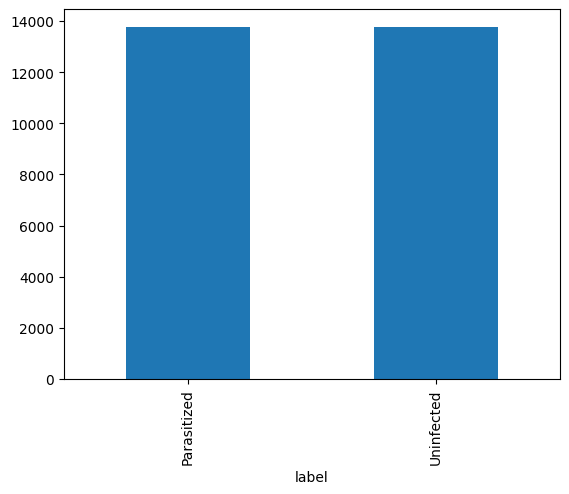

In [71]:
df.label.value_counts().plot(kind='bar') # Balanced Data

In [72]:
# df['label']= df['label'].map({'Parasitized':1, 'Uninfected':0})

In [73]:
batch_size=16,
img_size=(224,224)
channels = 3

In [194]:
# SPlit the Data into Train_test_split


# 80% Train, 20% temp
train_df, temp_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["label"],
    random_state=42
)

# Split temp into 10% val, 10% test
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df["label"],
    random_state=42
)


In [195]:
print("shape of Train:",train_df.shape)
print("Shape of test:",test_df.shape)
print("Shape of Val:",val_df.shape)

shape of Train: (22048, 2)
Shape of test: (2756, 2)
Shape of Val: (2756, 2)


In [196]:
# def scalar(img):
#     return img.astype('float')/255.0

train_gen= ImageDataGenerator(
    rescale=1./255
)
test_gen= ImageDataGenerator(
    # preprocessing_function=preprocess_input
    rescale=1./255
)

val_gen = ImageDataGenerator(
    # preprocessing_function = preprocess_input
    rescale= 1./255
)

In [182]:
# train_df["label"] = train_df["label"].astype(str)
# val_df["label"]   = val_df["label"].astype(str)
# test_df["label"]  = test_df["label"].astype(str)


In [183]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22048 entries, 13246 to 23654
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  22048 non-null  object
 1   label       22048 non-null  object
dtypes: object(2)
memory usage: 516.8+ KB


In [197]:
train_gen = train_gen.flow_from_dataframe(
    dataframe = train_df,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    x_col='image_path',
    y_col= 'label',
    shuffle=True,
    color_mode='rgb'
)

test_gen = test_gen.flow_from_dataframe(
    dataframe = test_df,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    x_col='image_path',
    y_col= 'label',
    color_mode='rgb',
    shuffle=False
)

val_gen = val_gen.flow_from_dataframe(
    dataframe = val_df,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    x_col='image_path',
    y_col= 'label',
    shuffle=True,
    color_mode='rgb'
)


Found 22046 validated image filenames belonging to 2 classes.
Found 2756 validated image filenames belonging to 2 classes.
Found 2756 validated image filenames belonging to 2 classes.


In [198]:
train_gen.class_indices
test_gen.class_indices
val_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [199]:
train_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [231]:
conv_base = tensorflow.keras.applications.EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

In [232]:
import tensorflow
from tensorflow.keras.regularizers import l2

In [233]:
model = Sequential()
model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu', kernel_regularizer= l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [234]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 7, 7, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,980,912 (41.89 MB)

 Trainable params: 10,893,353 (41.55 MB)

 Non-trainable params: 87,559 (342.03 KB)

In [235]:
from tensorflow.keras.optimizers import Adam, Adamax

In [236]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [237]:

sum(layer.trainable for layer in conv_base.layers)

385

In [241]:
# for i , layer,in enumerate(conv_base.layers):
#     if layer.trainable:
#         print(i, layer.name)

In [242]:
history = model.fit(train_gen, epochs=5, validation_data=val_gen)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 361s 367ms/step - accuracy: 0.7775 - loss: 0.4922 - val_accuracy: 0.9282 - val_loss: 0.2089
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 194s 281ms/step - accuracy: 0.9451 - loss: 0.1840 - val_accuracy: 0.9565 - val_loss: 0.1532
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 200s 290ms/step - accuracy: 0.9558 - loss: 0.1543 - val_accuracy: 0.9510 - val_loss: 0.1719
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 200s 290ms/step - accuracy: 0.9623 - loss: 0.1351 - val_accuracy: 0.9601 - val_loss: 0.1485
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 200s 290ms/step - accuracy: 0.9646 - loss: 0.1223 - val_accuracy: 0.9655 - val_loss: 0.1250


In [243]:
model.evaluate(test_gen)

87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.9594 - loss: 0.1470


[0.12584511935710907, 0.9666182994842529]

In [244]:
y_pred_proba = model.predict(test_gen)
y_pred = (y_pred_proba > 0.5).astype('int').ravel()
y_pred

87/87 ━━━━━━━━━━━━━━━━━━━━ 26s 192ms/step


array([0, 0, 0, ..., 0, 1, 0])

In [246]:
y_true = test_gen.classes
# y_true

In [247]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [248]:
print("Classification_report", classification_report(y_pred,y_true))

Classification_report               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1342
           1       0.98      0.95      0.97      1414

    accuracy                           0.97      2756
   macro avg       0.97      0.97      0.97      2756
weighted avg       0.97      0.97      0.97      2756



In [273]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true, y_pred)


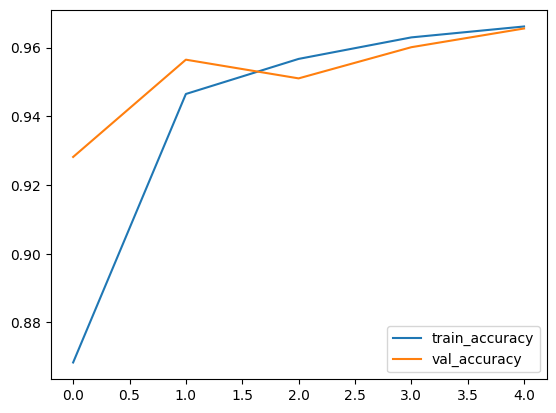

In [274]:
plt.plot(history.history['accuracy'], label=['train_accuracy'])
plt.plot(history.history['val_accuracy'], label=['val_accuracy'])
plt.legend()



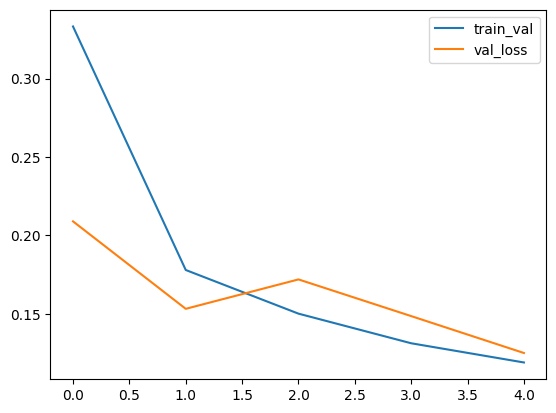

In [275]:
plt.plot(history.history['loss'], label=['train_val'])
plt.plot(history.history['val_loss'], label=['val_loss'])
plt.legend()


In [276]:
min_train_acc = np.min(history.history['accuracy']) 
max_train_acc = np.max(history.history['accuracy'])

min_train_loss= np.min(history.history['loss']) 
max_train_loss= np.max(history.history['loss'])

print("Train_report :\n")
print("Min Losses:",min_train_loss)
print("Max Losses",max_train_loss)
print("Max Acc:",max_train_acc)
print("Min Accc", min_train_acc)

Train_report :

Min Losses: 0.11895448714494705
Max Losses 0.333231121301651
Max Acc: 0.9661163091659546
Min Accc 0.8683661222457886


In [277]:
min_val_acc = np.min(history.history['val_accuracy']) 
max_val_acc = np.max(history.history['val_accuracy'])

min_val_loss= np.min(history.history['val_loss']) 
max_val_loss= np.max(history.history['val_loss'])

print("Validation_report :\n")
print("Min Losses:",min_val_loss)
print("Max Losses",max_val_loss)
print("Max Acc:",max_val_acc)
print("Min Accc", min_val_acc)

Validation_report :

Min Losses: 0.12499528378248215
Max Losses 0.20894771814346313
Max Acc: 0.96552973985672
Min Accc 0.9281567335128784


<Axes: >

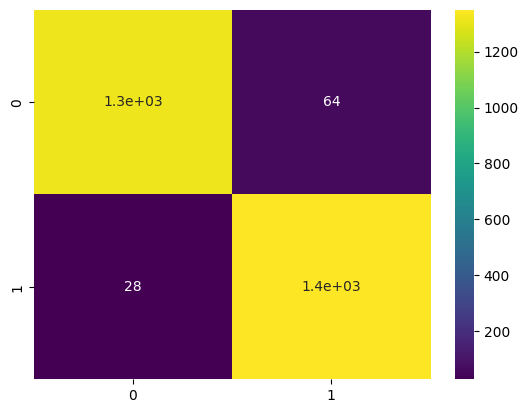

In [283]:
import seaborn as sb
sb.heatmap(matrix, annot=True, cmap='viridis')

In [286]:
summary = pd.DataFrame({
    "metrics":['Train_acc', 'Train_loss', 'Val_acc', 'Val_loss'],
    "Min":[
        'min_train_acc',
        'min_train_loss',
        'min_val_acc',
        'min_val_loss'
    ],
    "Max":[
        "max_train_acc",
        "max_train_loss",
        'max_val_acc',
        "max_val_loss",
        ]
    
    
})

In [291]:
summary

metrics             Min             Max
0   Train_acc   min_train_acc   max_train_acc
1  Train_loss  min_train_loss  max_train_loss
2     Val_acc     min_val_acc     max_val_acc
3    Val_loss    min_val_loss    max_val_loss

In [292]:
summary['metrics']

0     Train_acc
1    Train_loss
2       Val_acc
3      Val_loss
Name: metrics, dtype: object

In [309]:
# Best Train and Val epochs
best_train_epoch = np.argmin(history.history['loss']) + 1
best_val_epoch = np.argmin(history.history['val_loss']) +1

In [312]:
print("Best Train loss epoch at ", best_train_epoch)
print("Best Val loss epoch  at ", best_val_epoch) # True

Best Train loss epoch at  5
Best Val loss epoch  at  5


In [317]:
from sklearn.metrics import roc_curve, roc_auc_score

In [316]:
fpr, tpr,thre = roc_curve(y_pred,y_true)

In [319]:
roc_auc = roc_auc_score(y_true,y_pred)
print(roc_auc)

0.9666182873730044


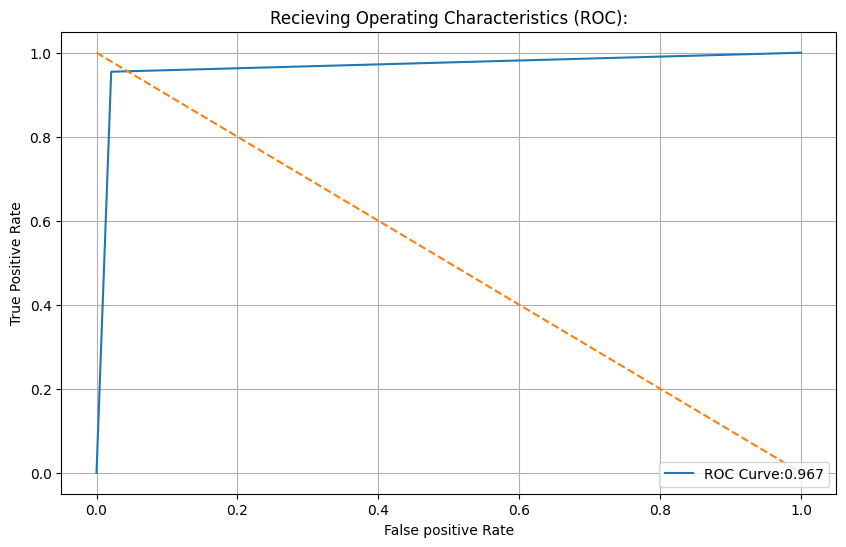

In [339]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr, label=f"ROC Curve:{roc_auc:.3f}")
plt.plot([0,1], [1,0], linestyle='--', )
plt.legend(loc='lower right')
plt.title("Recieving Operating Characteristics (ROC):")
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.xlim()
plt.show()

In [347]:
from sklearn.metrics import log_loss

logloss = log_loss(y_true, y_pred_proba)
print(f"Log Loss: {logloss:.4f} (lower is better)")

Log Loss: 0.1026 (lower is better)


In [350]:
# Save the Model

model.save('malaria_Detection_EfficientNetB3.93%_acc.h5')

In [351]:
# SOme EDA

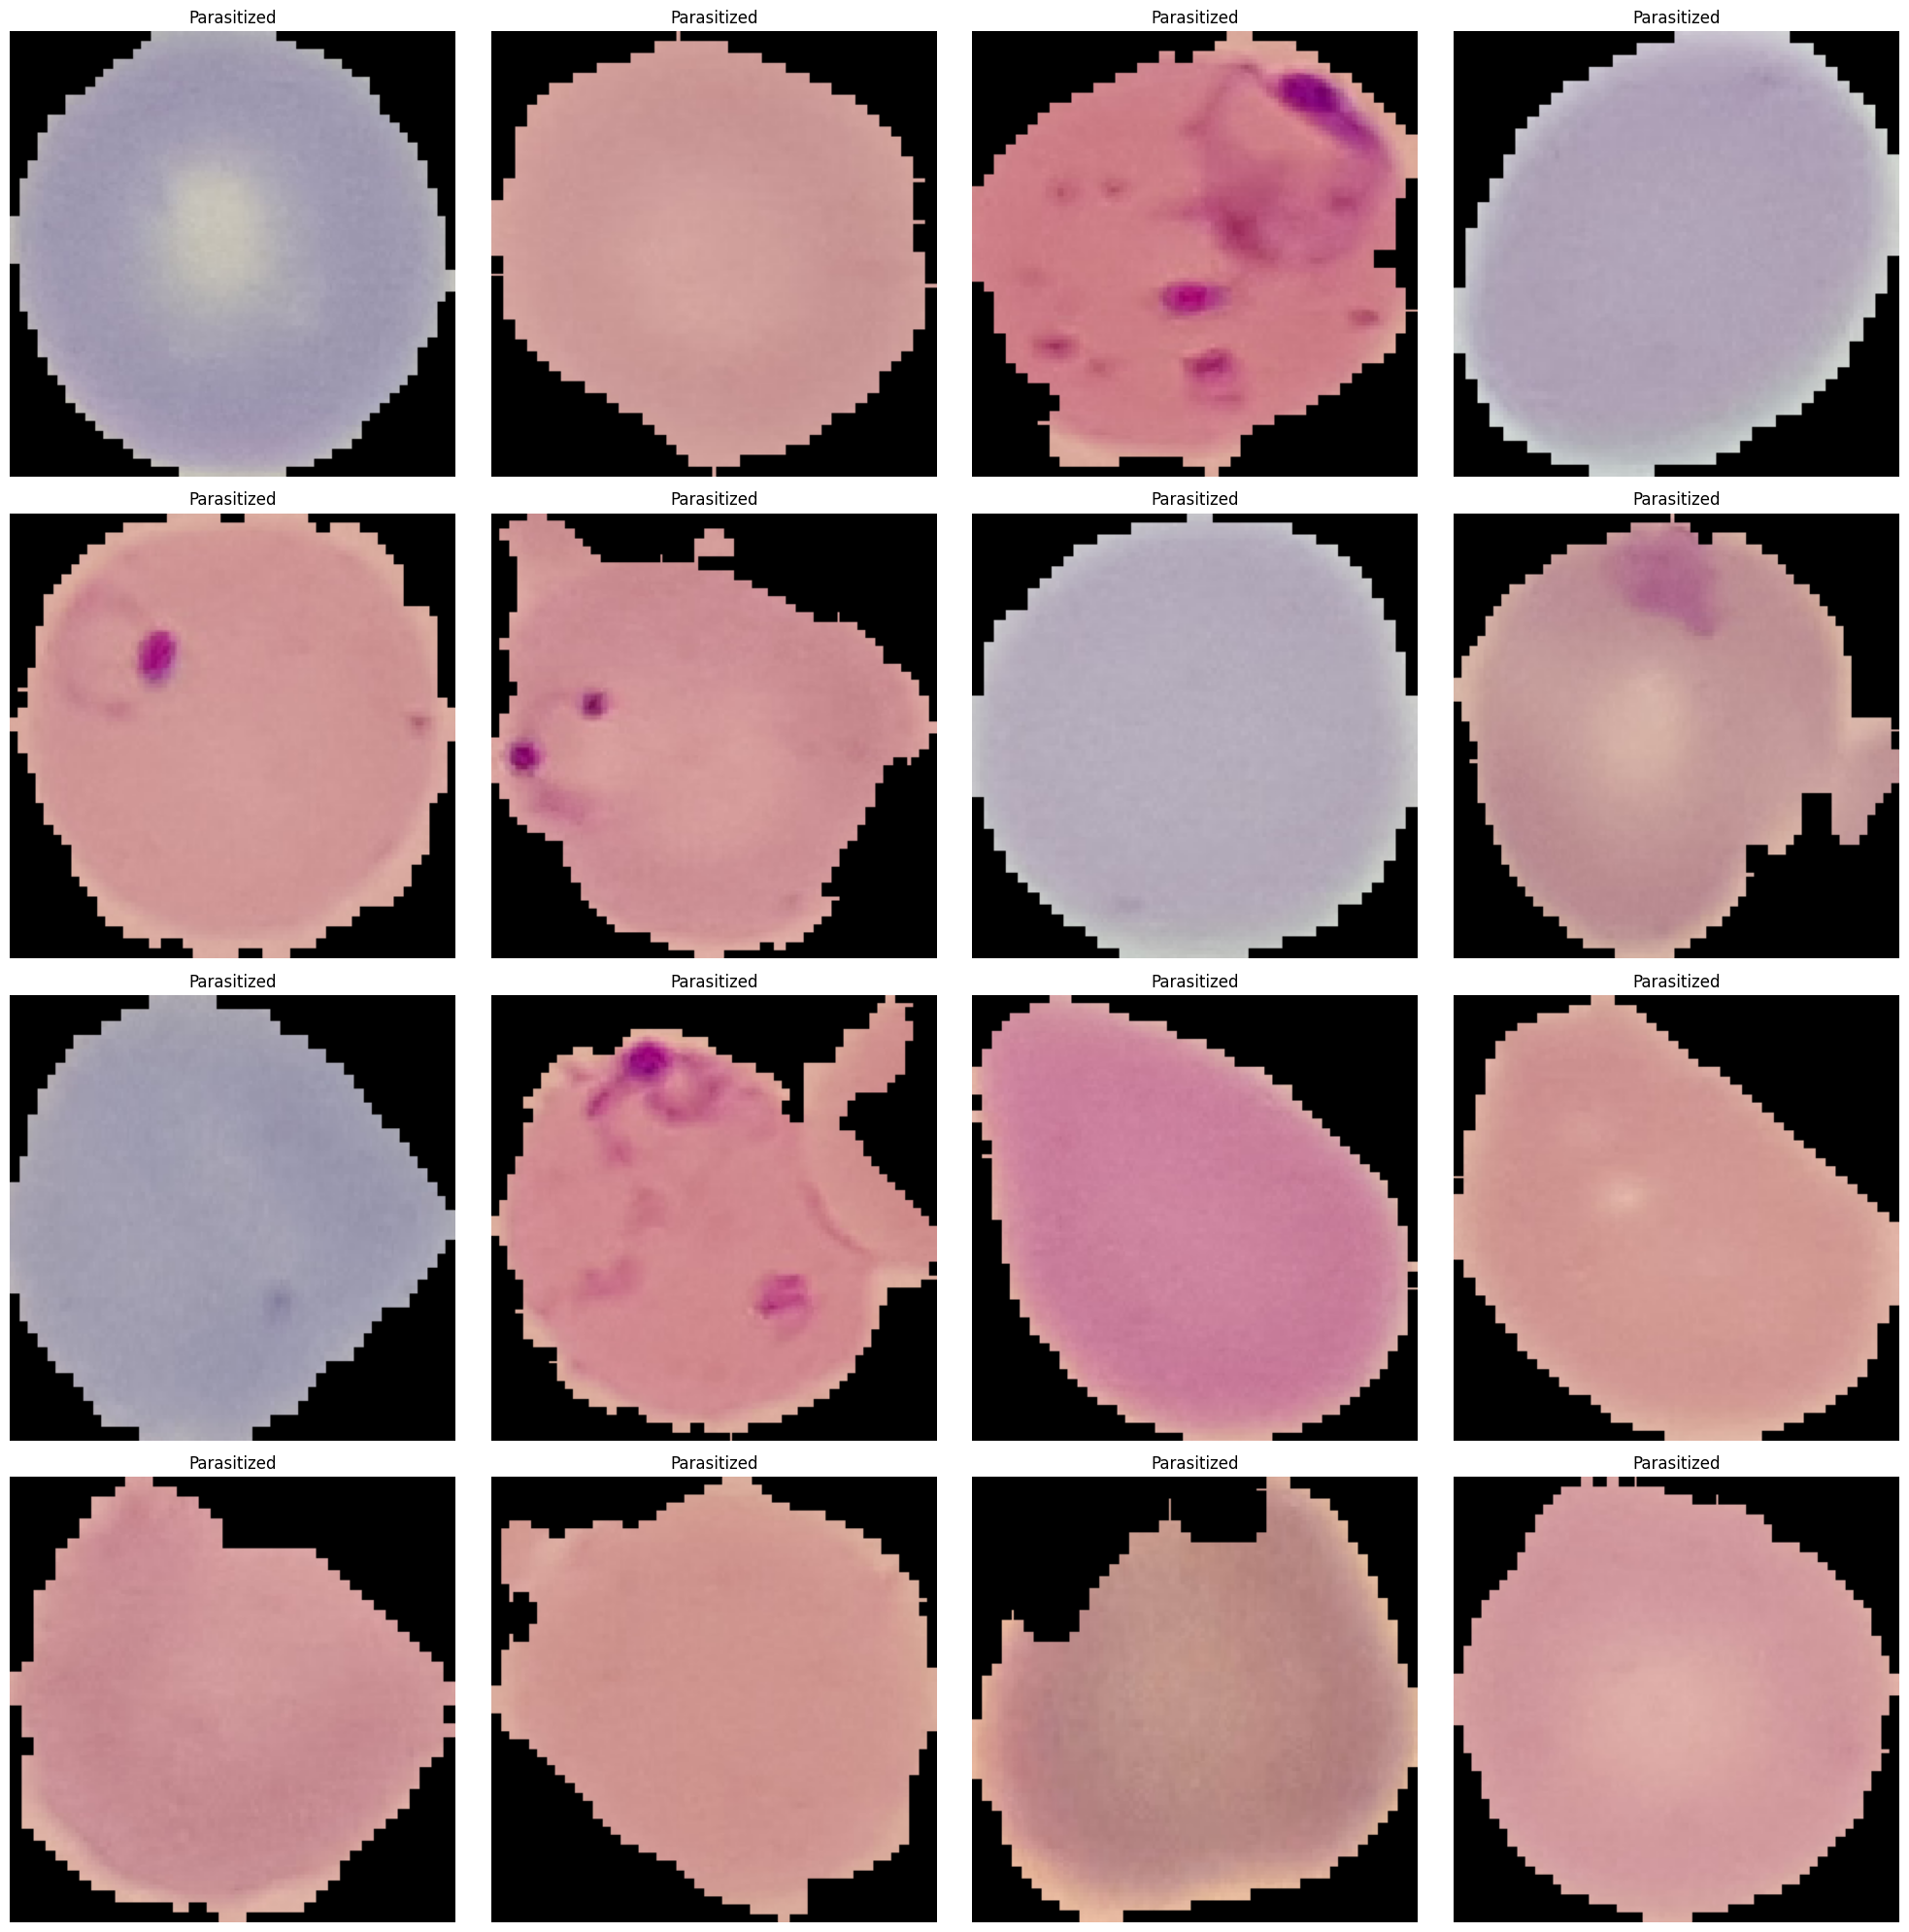

In [375]:
images,labels  = next(val_gen)
classes = list(train_gen.class_indices.keys())
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(images[i])
    index = (np.argmax(labels[i]))
    plt.title(classes[index])
    plt.axis('off')
plt.tight_layout()
plt.show()



In [380]:
# Check Predictions 
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2

In [410]:
def predict_img(img_path,target_size=(224,224)):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Invalid image path: {img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,target_size)
    img = img.astype('float32')/255.0
    img = np.expand_dims(img,axis=0)
    pred = model.predict(img)
    return pred [0][0]

In [411]:
proba = predict_img('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [426]:
classes[proba>0.5] # Correct

'Uninfected'

In [418]:
proba2 = predict_img('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [421]:
classes[proba2 > 0.5] #COrrect Prediction 

'Parasitized'

In [422]:
# ANother One 

In [425]:
proba3 = predict_img('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
classes[proba3>0.5] # Predicted Correctly

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


'Parasitized'